In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Input
from tensorflow.keras.models import Model
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import os

In [2]:
input = Input((244,244,1))

conv1 = Conv2D(filters = 64,kernel_size =(3,3),padding = 'same',activation ='relu')(input)
conv2 = Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation ='relu')(conv1)
max1 = MaxPooling2D(pool_size =(2,2),strides= None,padding = 'valid')(conv2)

conv3 = Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation ='relu')(max1)
conv4 = Conv2D(filters = 128,kernel_size = (3,3),padding ='same',activation = 'relu')(conv3)
max2 = MaxPooling2D(pool_size = (2,2),strides= None,padding= 'valid' )(conv4)

conv5 = Conv2D(filters= 256,kernel_size = (3,3),padding ='same',activation ='relu')(max2)
conv6 = Conv2D(filters =256,activation ='relu',padding ='same',kernel_size =(3,3))(conv5)
conv7 = Conv2D(filters =512,activation ='relu',padding='same',kernel_size =(3,3))(conv6)

max3 =  MaxPooling2D((2,2))(conv7)

conv8= Conv2D(filters =512,activation ='relu',padding='same',kernel_size =(3,3))(max3)
conv9 = Conv2D(filters =512,activation ='relu',padding='same',kernel_size =(3,3))(conv8)
conv10 = Conv2D(filters =512,activation ='relu',padding='same',kernel_size =(3,3))(conv9)
max4 =  MaxPooling2D(pool_size = (2,2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(max4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)


max5  = MaxPooling2D((2, 2))(conv13)
flat   = Flatten()(max5)

dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=input, outputs=output)


In [10]:
img1 = '/content/dandelions.jpg'
img2 = '/content/dandelions_1.jpg'
img3 = '/content/sunflower.jpg'
img4 = '/content/tulips.jpg'
img5 = '/content/tulips_1.jpg'
img6 = '/content/rose_1.jpg'
img7 = '/content/rosw.jpg'


img = [img1, img2, img3, img4,img5,img6,img7]

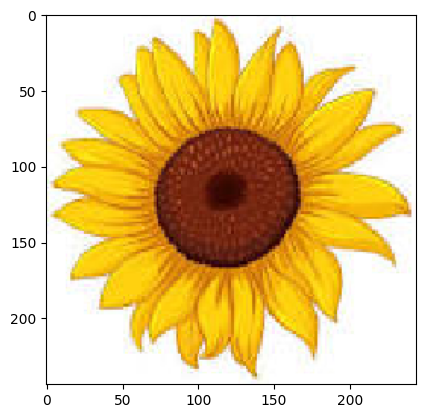

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [23]:
plt.imshow(image.load_img(img[2],target_size =(244,244)))
plt.show()
imag = keras.utils.load_img(img[2],target_size =(244,244))
imag = keras.utils.img_to_array(imag)
imag

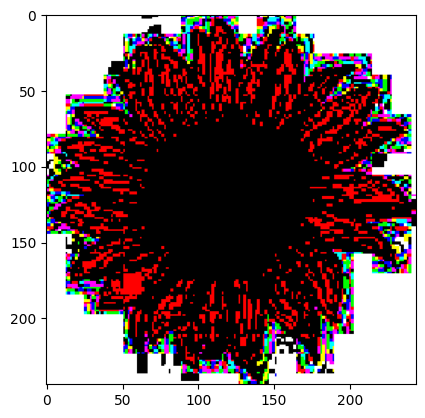

In [15]:
plt.imshow(imag//255)

In [24]:
def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imag[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()

    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

def load_img(img_path):
  img = keras.utils.load_img(image_path,target_size =(244,44))
  img = keras.utils.img_to_array(img)
  img = np.expand_dims(img,axis =0)
  img = preprocess_input(img)
  return img

In [ ]:

from keras.applications.vgg16 import VGG16
weights = '/content/vgg16_weights_tf_dim_ordering_tf_kernels.h5'

vgg16_model = VGG16()
_get_predictions(vgg16_model)